In [10]:
from typing import List
import random

import glob
from nltk import tokenize, download
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import string
import time
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
def split_text(filepath: str, min_char: int = 5) -> List[str]:
    
    text = str()
    with open(filepath, 'r', encoding='utf8') as file:
        text = file.read().replace('\n', ' ')
    
    sentences = tokenize.sent_tokenize(text)    
    sentences = [sentence for sentence in sentences if len(sentence) >= min_char]

    return list(sentences)

def plot_confusion_matrix(cm, classes: List[str],
                          normalize: bool = False,
                          title: str = 'Матрица ошибок',
                          cmap = plt.cm.Greens):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Нормированная матрица ошибок')
    else:
        print('Матрица ошибок')

    print(cm)
       
    df_cm = pd.DataFrame(cm, index = classes,
                  columns = classes)
    sns.heatmap(df_cm, annot=True, cmap = cmap)
    plt.ylabel('Правильный ответ')
    plt.xlabel('Ответ модели')
    plt.title(title)

In [13]:
import warnings
warnings.filterwarnings('ignore')

sumsum = 0
sumbs = 0
avg_perf = 0
gorb_total = []
bor_total = []

for rndsd in range(0, 100):
    rndsd = 0
    borisov = []
    for path in glob.glob('borisov_full.txt'):
        borisov += split_text(path)
        
    gorbachevskiy = []
    for path in glob.glob('gorbachevskiy_full.txt'):
        gorbachevskiy += split_text(path)
    
    text_dict = { 'Borisov': borisov, 'Gorbachevskiy': gorbachevskiy}      
    np.random.seed(rndsd)
    random.seed(rndsd)
    max_len = min([len(borisov), len(gorbachevskiy)])
    
    names = [borisov, gorbachevskiy]   
    combined = []
    for name in names:
        name = np.random.choice(name, max_len, replace = False)
        combined += list(name)
    labels = ['Borisov'] * max_len + ['Gorbachevskiy'] * max_len
    zipped = list(zip(combined, labels))
    random.shuffle(zipped)
    combined, labels = zip(*zipped)
    
    out_data = pd.DataFrame()
    out_data['text'] = combined
    out_data['author'] = labels
    
    out_data.to_csv('full_data_train_september_cardinal_3.csv', index=False)
    
    traindf = pd.read_csv('full_data_train_september_cardinal_3.csv')
    traindf.head()
    authorsdupl=traindf['author'].to_list()
    authors=set(authorsdupl)
    
    traindf['text'] = traindf['text'].str.replace(',','')
    traindf['text'] = traindf['text'].str.replace(')', '')
    traindf['text'] = traindf['text'].str.replace('(', '')
    
    traindf['text'] = traindf['text'].str.replace('--', '')
    
    traindf['text'] = traindf['text'].str.replace(']', '')
    traindf['text'] = traindf['text'].str.replace('[', '')
    
    traindf['text'] = traindf['text'].str.replace('»', '')
    traindf['text'] = traindf['text'].str.replace('«', '')
    
    traindf['text'] = traindf['text'].str.replace('}', '')
    traindf['text'] = traindf['text'].str.replace('{', '')
    
    traindf['text'] = traindf['text'].str.replace('?', '')
    traindf['text'] = traindf['text'].str.replace('!', '')
    traindf['text'] = traindf['text'].str.replace(';', '')
    traindf['text'] = traindf['text'].str.lower()
    
    # Первая часть служебных слов
    
    traindf['text'] = traindf['text'].str.replace(' на ', ' ')
    traindf['text'] = traindf['text'].str.replace(' для ', ' ')
    traindf['text'] = traindf['text'].str.replace(' о ', ' ')
    traindf['text'] = traindf['text'].str.replace(' об ', ' ')
    traindf['text'] = traindf['text'].str.replace(' за ', ' ')
    traindf['text'] = traindf['text'].str.replace(' под ', ' ')
    traindf['text'] = traindf['text'].str.replace(' перед ', ' ')
    traindf['text'] = traindf['text'].str.replace(' с ', ' ')
    traindf['text'] = traindf['text'].str.replace(' между ', ' ')
    traindf['text'] = traindf['text'].str.replace(' к ', ' ')
    traindf['text'] = traindf['text'].str.replace(' до ', ' ')
    
    traindf['text'] = traindf['text'].str.replace(' и ', ' ')
    traindf['text'] = traindf['text'].str.replace(' а ', ' ')
    traindf['text'] = traindf['text'].str.replace(' но ', ' ')
    traindf['text'] = traindf['text'].str.replace(' ни ', ' ')
    traindf['text'] = traindf['text'].str.replace(' чтобы ', ' ')
    traindf['text'] = traindf['text'].str.replace(' что ', ' ')
    
    traindf['text'] = traindf['text'].str.replace(' лишь ', ' ')
    traindf['text'] = traindf['text'].str.replace(' только ', ' ')
    traindf['text'] = traindf['text'].str.replace(' не ', ' ')
    
    traindf['text'] = traindf['text'].str.replace(' ах ', ' ')
    traindf['text'] = traindf['text'].str.replace(' ох ', ' ')
    traindf['text'] = traindf['text'].str.replace(' ой ', ' ')
    
    # Вторая часть служебных слов
    
    traindf['text'] = traindf['text'].str.replace(' над ', ' ')
    traindf['text'] = traindf['text'].str.replace(' около ', ' ')
    traindf['text'] = traindf['text'].str.replace(' в ', ' ')
    traindf['text'] = traindf['text'].str.replace(' после ', ' ')
    traindf['text'] = traindf['text'].str.replace(' от ', ' ')
    traindf['text'] = traindf['text'].str.replace(' у ', ' ')
    traindf['text'] = traindf['text'].str.replace(' по ', ' ')
    traindf['text'] = traindf['text'].str.replace(' без ', ' ')
    traindf['text'] = traindf['text'].str.replace(' для ', ' ')
    traindf['text'] = traindf['text'].str.replace(' при ', ' ')
    traindf['text'] = traindf['text'].str.replace(' из ', ' ')
    traindf['text'] = traindf['text'].str.replace(' за ', ' ')
    
    traindf['text'] = traindf['text'].str.replace(' тоже ', ' ')
    traindf['text'] = traindf['text'].str.replace(' также ', ' ')
    traindf['text'] = traindf['text'].str.replace(' то ', ' ')
    traindf['text'] = traindf['text'].str.replace(' же ', ' ')
    traindf['text'] = traindf['text'].str.replace(' бы ', ' ')
    traindf['text'] = traindf['text'].str.replace(' будто ', ' ')
    
    traindf['text'] = traindf['text'].str.replace(' ведь ', ' ')
    traindf['text'] = traindf['text'].str.replace(' уж ', ' ')
    traindf['text'] = traindf['text'].str.replace(' таки ', ' ')
    
    # Третья часть
    
    traindf['text'] = traindf['text'].str.replace(' ли ', ' ')
    traindf['text'] = traindf['text'].str.replace(' вон ', ' ')
    traindf['text'] = traindf['text'].str.replace(' вот ', ' ')
    traindf['text'] = traindf['text'].str.replace(' именно ', ' ')
    traindf['text'] = traindf['text'].str.replace(' точь-в-точь ', ' ')
    traindf['text'] = traindf['text'].str.replace(' несмотря на ', ' ')
    traindf['text'] = traindf['text'].str.replace(' несмотря ', ' ')
    traindf['text'] = traindf['text'].str.replace(' благодаря ', ' ')
    traindf['text'] = traindf['text'].str.replace(' зато ', ' ')
    traindf['text'] = traindf['text'].str.replace(' из-за ', ' ')
    traindf['text'] = traindf['text'].str.replace(' из-под ', ' ')
    traindf['text'] = traindf['text'].str.replace(' оттого ', ' ')
    traindf['text'] = traindf['text'].str.replace(' причем ', ' ')
    traindf['text'] = traindf['text'].str.replace(' причём ', ' ')
    traindf['text'] = traindf['text'].str.replace(' притом ', ' ')
    traindf['text'] = traindf['text'].str.replace(' дабы ', ' ')
    traindf['text'] = traindf['text'].str.replace(' чем ', ' ')
    traindf['text'] = traindf['text'].str.replace(' чём ', ' ')
    traindf['text'] = traindf['text'].str.replace(' том ', ' ')
    traindf['text'] = traindf['text'].str.replace(' ежели ', ' ')
    traindf['text'] = traindf['text'].str.replace(' коли ', ' ')
    
    dictionaryauthors={}
    for x in authors:
        dictionaryauthors[x]=""

    text=traindf['text'].to_list()

    for i in range(len(text)):   
        dictionaryauthors[authorsdupl[i]]+=text[i]
        
    vectorizer = CountVectorizer()
    vectors = vectorizer.fit_transform(traindf['text'])
    
#     param_grid = [
#   {'C': [1.0, 2.0, 3.0, 5.0, 10.0, 100.0, 1000.0], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree' : [1, 2, 3, 4, 5], 'gamma' : ['scale', 'auto']}
#  ]
    
    param_grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
    
    base_estimator = LogisticRegression()
    X_train, X_test, y_train, y_test = train_test_split(vectors, authorsdupl, test_size=0.2, random_state=1337)
    sh=GridSearchCV(base_estimator,param_grid,cv=10).fit(X_train, y_train)

#     base_estimator = SVC()
#     X_train, X_test, y_train, y_test = train_test_split(vectors, authorsdupl, test_size=0.2, random_state=1337)
#     sh = GridSearchCV(cv=5, estimator=base_estimator, param_grid=param_grid).fit(X_train, y_train)

    bs = sh.best_score_
    best_est = sh.best_estimator_
    
    
    #Read real test
    
    traindf = pd.read_csv('unknown_august.csv')
    traindf.head()
    authorsdupl=traindf['author'].to_list()
    authors=set(authorsdupl)
        
    traindf['text'] = traindf['text'].str.replace(',','')
    traindf['text'] = traindf['text'].str.replace(')', '')
    traindf['text'] = traindf['text'].str.replace('(', '')
    
    traindf['text'] = traindf['text'].str.replace('--', '')
    
    traindf['text'] = traindf['text'].str.replace(']', '')
    traindf['text'] = traindf['text'].str.replace('[', '')
    
    traindf['text'] = traindf['text'].str.replace('»', '')
    traindf['text'] = traindf['text'].str.replace('«', '')
    
    traindf['text'] = traindf['text'].str.replace('}', '')
    traindf['text'] = traindf['text'].str.replace('{', '')
    
    traindf['text'] = traindf['text'].str.replace('?', '')
    traindf['text'] = traindf['text'].str.replace('!', '')
    traindf['text'] = traindf['text'].str.replace(';', '')
    traindf['text'] = traindf['text'].str.lower()
    
    # Первая часть служебных слов
    
    traindf['text'] = traindf['text'].str.replace(' на ', ' ')
    traindf['text'] = traindf['text'].str.replace(' для ', ' ')
    traindf['text'] = traindf['text'].str.replace(' о ', ' ')
    traindf['text'] = traindf['text'].str.replace(' об ', ' ')
    traindf['text'] = traindf['text'].str.replace(' за ', ' ')
    traindf['text'] = traindf['text'].str.replace(' под ', ' ')
    traindf['text'] = traindf['text'].str.replace(' перед ', ' ')
    traindf['text'] = traindf['text'].str.replace(' с ', ' ')
    traindf['text'] = traindf['text'].str.replace(' между ', ' ')
    traindf['text'] = traindf['text'].str.replace(' к ', ' ')
    traindf['text'] = traindf['text'].str.replace(' до ', ' ')
    
    traindf['text'] = traindf['text'].str.replace(' и ', ' ')
    traindf['text'] = traindf['text'].str.replace(' а ', ' ')
    traindf['text'] = traindf['text'].str.replace(' но ', ' ')
    traindf['text'] = traindf['text'].str.replace(' ни ', ' ')
    traindf['text'] = traindf['text'].str.replace(' чтобы ', ' ')
    traindf['text'] = traindf['text'].str.replace(' что ', ' ')
    
    traindf['text'] = traindf['text'].str.replace(' лишь ', ' ')
    traindf['text'] = traindf['text'].str.replace(' только ', ' ')
    traindf['text'] = traindf['text'].str.replace(' не ', ' ')
    
    traindf['text'] = traindf['text'].str.replace(' ах ', ' ')
    traindf['text'] = traindf['text'].str.replace(' ох ', ' ')
    traindf['text'] = traindf['text'].str.replace(' ой ', ' ')
    
    # Вторая часть служебных слов
    
    traindf['text'] = traindf['text'].str.replace(' над ', ' ')
    traindf['text'] = traindf['text'].str.replace(' около ', ' ')
    traindf['text'] = traindf['text'].str.replace(' в ', ' ')
    traindf['text'] = traindf['text'].str.replace(' после ', ' ')
    traindf['text'] = traindf['text'].str.replace(' от ', ' ')
    traindf['text'] = traindf['text'].str.replace(' у ', ' ')
    traindf['text'] = traindf['text'].str.replace(' по ', ' ')
    traindf['text'] = traindf['text'].str.replace(' без ', ' ')
    traindf['text'] = traindf['text'].str.replace(' для ', ' ')
    traindf['text'] = traindf['text'].str.replace(' при ', ' ')
    traindf['text'] = traindf['text'].str.replace(' из ', ' ')
    traindf['text'] = traindf['text'].str.replace(' за ', ' ')
    
    traindf['text'] = traindf['text'].str.replace(' тоже ', ' ')
    traindf['text'] = traindf['text'].str.replace(' также ', ' ')
    traindf['text'] = traindf['text'].str.replace(' то ', ' ')
    traindf['text'] = traindf['text'].str.replace(' же ', ' ')
    traindf['text'] = traindf['text'].str.replace(' бы ', ' ')
    traindf['text'] = traindf['text'].str.replace(' будто ', ' ')
    
    traindf['text'] = traindf['text'].str.replace(' ведь ', ' ')
    traindf['text'] = traindf['text'].str.replace(' уж ', ' ')
    traindf['text'] = traindf['text'].str.replace(' таки ', ' ')
    
    # Третья часть
    
    traindf['text'] = traindf['text'].str.replace(' ли ', ' ')
    traindf['text'] = traindf['text'].str.replace(' вон ', ' ')
    traindf['text'] = traindf['text'].str.replace(' вот ', ' ')
    traindf['text'] = traindf['text'].str.replace(' именно ', ' ')
    traindf['text'] = traindf['text'].str.replace(' точь-в-точь ', ' ')
    traindf['text'] = traindf['text'].str.replace(' несмотря на ', ' ')
    traindf['text'] = traindf['text'].str.replace(' несмотря ', ' ')
    traindf['text'] = traindf['text'].str.replace(' благодаря ', ' ')
    traindf['text'] = traindf['text'].str.replace(' зато ', ' ')
    traindf['text'] = traindf['text'].str.replace(' из-за ', ' ')
    traindf['text'] = traindf['text'].str.replace(' из-под ', ' ')
    traindf['text'] = traindf['text'].str.replace(' оттого ', ' ')
    traindf['text'] = traindf['text'].str.replace(' причем ', ' ')
    traindf['text'] = traindf['text'].str.replace(' причём ', ' ')
    traindf['text'] = traindf['text'].str.replace(' притом ', ' ')
    traindf['text'] = traindf['text'].str.replace(' дабы ', ' ')
    traindf['text'] = traindf['text'].str.replace(' чем ', ' ')
    traindf['text'] = traindf['text'].str.replace(' чём ', ' ')
    traindf['text'] = traindf['text'].str.replace(' том ', ' ')
    traindf['text'] = traindf['text'].str.replace(' ежели ', ' ')
    traindf['text'] = traindf['text'].str.replace(' коли ', ' ')
    
    dictionaryauthors={}
    for x in authors:
        dictionaryauthors[x]=""

    text=traindf['text'].to_list()

    for i in range(len(text)):    
        dictionaryauthors[authorsdupl[i]]+=text[i]
        
    vectors = vectorizer.transform(traindf['text']).todense()
    X_train, X_test, y_train, y_test = train_test_split(vectors, authorsdupl, test_size=0.99, random_state=1337)
    
    predictions = best_est.predict(X_test)
    sumsum += (sum(predictions == 'Gorbachevskiy')/len(X_test))
    sumbs += bs
    
    gorb_total.append(sum(predictions == 'Gorbachevskiy')/len(X_test))
    bor_total.append(sum(predictions == 'Borisov')/len(X_test))
    avg_perf += bs
    
    print(f"i = {rndsd} lenB = {len(borisov)} lenG = {len(gorbachevskiy)} score = {bs} avg_score = {avg_perf/(1+rndsd)}  Borisov: {sum(predictions == 'Borisov')/len(X_test)} Gorbachevskiy: {sum(predictions == 'Gorbachevskiy')/len(X_test)} Avg = {sumsum/(1+rndsd)} AvgBs = {sumbs/(1+rndsd)}")
    break

i = 0 lenB = 411 lenG = 2620 score = 0.8281585081585081 avg_score = 0.8281585081585081  Borisov: 0.3250825082508251 Gorbachevskiy: 0.6749174917491749 Avg = 0.6749174917491749 AvgBs = 0.8281585081585081


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


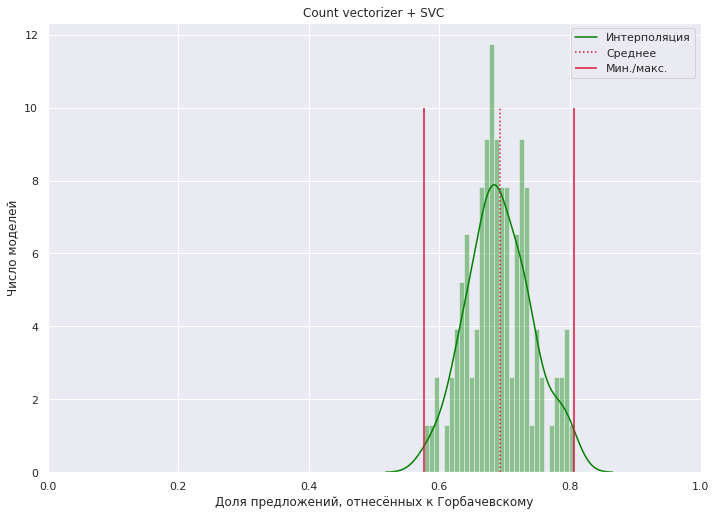

In [73]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
graph = sns.distplot(gorb_svc, kde=True, bins=30, color='green')
graph.set_title('Count vectorizer + SVC')
graph.vlines(0.6920407040704071, 0, 10, color='crimson', ls=':')
graph.vlines(0.5764576457645765, 0, 10, color='crimson')
graph.vlines(0.8063806380638063, 0, 10, color='crimson')
plt.xlabel('Доля предложений, отнесённых к Горбачевскому')
plt.ylabel('Число моделей')
plt.xlim(0.0, 1.0)
plt.legend(loc='best')
plt.legend(labels = ['Интерполяция', 'Среднее', 'Мин./макс.'])
plt.savefig('ave_count_vec_SVC.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


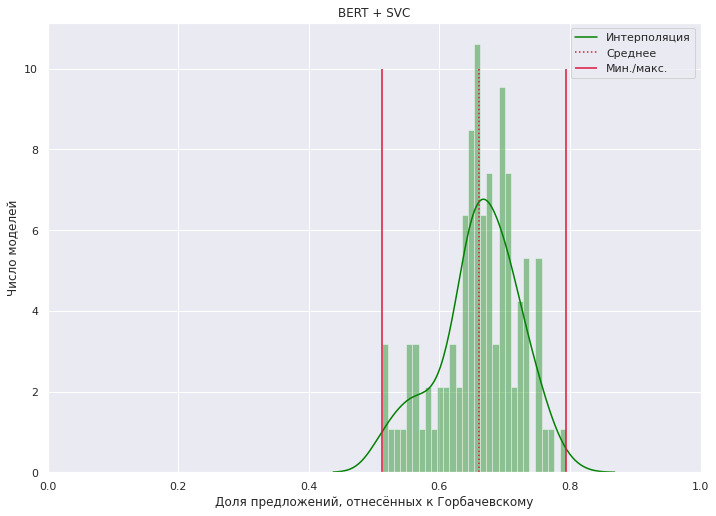

In [79]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
graph = sns.distplot(gorb_bert_svc, kde=True, bins=30, color='green')
graph.set_title('BERT + SVC')
graph.vlines(0.6598954895489548, 0, 10, color='crimson', ls=':')
graph.vlines(0.5115511551155115, 0, 10, color='crimson')
graph.vlines(0.7942794279427943, 0, 10, color='crimson')
plt.xlabel('Доля предложений, отнесённых к Горбачевскому')
plt.ylabel('Число моделей')
plt.xlim(0.0, 1.0)
plt.legend(loc='best')
plt.legend(labels = ['Интерполяция', 'Среднее', 'Мин./макс.'])
plt.savefig('ave_bert_SVC.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


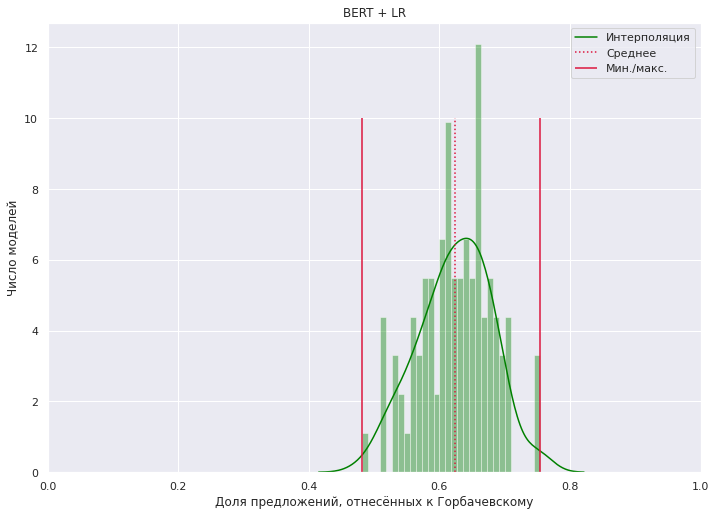

In [90]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
graph = sns.distplot(gorb_bert_lr, kde=True, bins=30, color='green')
graph.set_title('BERT + LR')
graph.vlines(0.624075907590759, 0, 10, color='crimson', ls=':')
graph.vlines(0.48184818481848185, 0, 10, color='crimson')
graph.vlines(0.7546754675467546, 0, 10, color='crimson')
plt.xlabel('Доля предложений, отнесённых к Горбачевскому')
plt.ylabel('Число моделей')
plt.xlim(0.0, 1.0)
plt.legend(loc='best')
plt.legend(labels = ['Интерполяция', 'Среднее', 'Мин./макс.'])
plt.savefig('ave_bert_LR.png')